In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
# %matplotlib qt
plt.ion()

# Gradient Descent in $D=1$

In [3]:
## We minimize a simple parabola
def J(theta):
    return (theta+1)**2

# We need to compute the derivative of J wrt its argument, theta, on a piece of paper, then type the result here in the code:
def gradient_of_J_wrt_its_argument(theta):
    return ?????  # this line, you need to know how to do, a couple of times in your life, at least

In [4]:
thetaRange = np.linspace(-3,2,51)
thetaRange


array([-3. , -2.9, -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2. ,
       -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9,
       -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,
        0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,
        1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ])

In [5]:
J(2.0)

9.0

In [6]:
## numpy = NUMerical PYthon

In [7]:
J(np.array([2,3,13]))

array([  9,  16, 196])

In [8]:
theta0 = 0.3 # valeur initiale

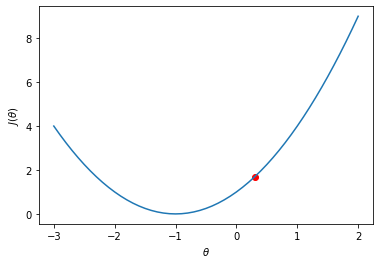

In [9]:
# We plot the function J(theta), and the initial location, theta0, 
## for which the assicated cost is J(theta)
plt.plot(thetaRange, J(thetaRange), label="J(theta)")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$J(\theta)$")
plt.scatter([theta0], [J(theta0)],color='red')

$\eta$

In [10]:
theta0 = 2
eta = 0.2  # learning rate 
epochMax = 7

In [11]:
def gradient_descent_with_plot(theta0, eta, epochMax):
    theta = theta0 # initial value 
    
    ## tricks for a gradient of colors 
    cmap = cm.jet # colormaps: jet, gist_rainbow, Dark2
    colorMaxNumber = epochMax
    gradient=cmap(np.linspace(0.0,1.0,colorMaxNumber)) # 

    plt.plot(thetaRange, J(thetaRange), label="J(theta)")
    plt.xlabel(r"$\theta$")
    plt.ylabel(r"$J(\theta)$")
    plt.scatter([theta0], [J(theta)],color='black')
    for epoch in range(epochMax):
        DeltaTheta = -eta * gradient_of_J_wrt_its_argument(theta)
        plt.arrow(theta, J(theta), DeltaTheta, 0, width=0.025, length_includes_head=True)
        theta += DeltaTheta
        colorvariable = tuple(gradient[epoch])
        plt.scatter([theta], [J(theta)],color=colorvariable)

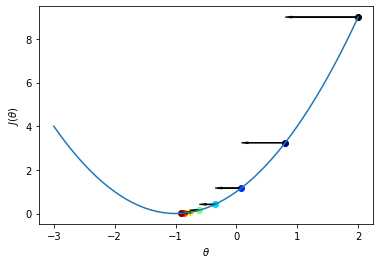

In [12]:
# we start from theta=2 and go down, efficiently, towards theta=-1
theta0 = 2
eta = 0.2
epochMax=7
gradient_descent_with_plot(theta0, eta, epochMax)

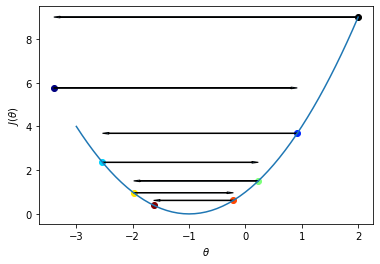

In [13]:
# eta is a bit too big, we bounce around, but end up converging 
theta0 = 2
eta = 0.9
epochMax=7
gradient_descent_with_plot(theta0, eta, epochMax)

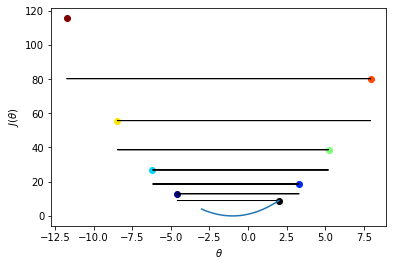

In [14]:
# eta is WAY too bug, we bounce around and diverge
theta0 = 2
eta = 1.1
epochMax = 7
gradient_descent_with_plot(theta0, eta, epochMax)

# Gradient Descent in $D=2$

In [15]:
# we'll minimize this function J2:
def J2(theta):
    X=theta[0]
    Y=theta[1]
    u = np.sqrt(X**2 + Y**2)
    Jvalue = np.sin(u)
    return Jvalue # this is a simple float -- not a vector 

# We must compute the gradient on a piece of paper, then type it here in the code: 
def gradient_of_J2_wrt_its_arg(theta):
    X=theta[0]
    Y=theta[1]
    u = np.sqrt(X**2 + Y**2)
    ## help: 
    ## du/dX = 1/2 * (X**2 + Y**2)^(1/2-1)*2*X
    ##       = 1 * (1/u)                  *  X
    ## so, what is d(J2)/dX ? and  d(J2)/dY ?
    Jgrad = np.array(\
                     [?? ,\
                      ??  ])
    return Jgrad # this is a 2x1 table  
    

In [16]:
# inspiré de : https://matplotlib.org/stable/gallery/mplot3d/surface3d.html
def plot_surface(fonction):
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    X = np.arange(-7, 5, 0.25)   # plays the role of theta0
    Y = np.arange(-5, 7, 0.25) # plays the role of theta1
    X, Y = np.meshgrid(X, Y) # useful for the 3D plots 
    theta = np.array([X,Y])
    Z = fonction(theta)
    
    # Plot the surface:
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=1, antialiased=False)
    ax.set_zlim(-1.01, 1.01)   # Customize the z axis.
    fig.colorbar(surf, shrink=0.5, aspect=5) # Add a color bar which maps values to colors.
    return fig, ax
#     plt.show()    

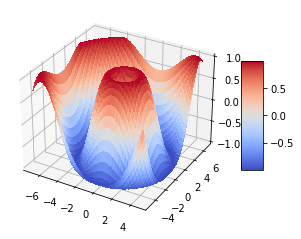

In [17]:
fig, ax = plot_surface(J2)

In [18]:
def plot_niveaux(fonction):
    X = np.arange(-1, 7, 0.25)   # plays the role of theta0
    Y = np.arange(-1, 5, 0.25) # plays the role of theta1
    X, Y = np.meshgrid(X, Y) # useful for the 3D plots 
    theta = np.array([X,Y])
    Z = fonction(theta)
    
    plt.contourf(X,Y,Z, cmap=cm.coolwarm,levels=40)
    return fig, ax    

(<Figure size 432x288 with 2 Axes>, <Axes3DSubplot:>)

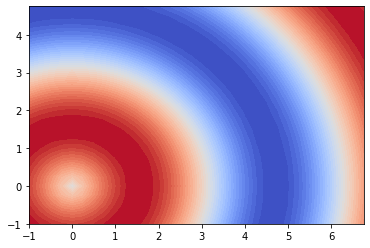

In [19]:
plot_niveaux(J2)

In [20]:
def gradient_descent_with_plot(theta0, eta, epochMax):
    theta = theta0 # valeur initiale
    
    ## tricks for a gradient of colors
    cmap = cm.jet 
    colorMaxNumber = epochMax
    gradient=cmap(np.linspace(0.0,1.0,colorMaxNumber)) # 
    
    ## preparing figure
    fig, ax = plot_niveaux(J2)
    plt.xlabel(r"$\theta_1$")
    plt.ylabel(r"$\theta_2$")
    
    # the gradient descent itself:
    for epoch in range(epochMax):
        DeltaTheta = -eta * gradient_of_J2_wrt_its_arg(theta) # array D=2 dimensionel 
        previous_theta_value = theta # c'est juste pour les plots
        theta += DeltaTheta
        
        # plt.arrow(previous_theta_value[0], previous_theta_value[1], theta[0], theta[1], width=0.025, length_includes_head=True)
        colorvariable = tuple(gradient[epoch])
        plt.scatter( [theta[0]], [theta[1]] ,color=colorvariable)
        

In [21]:
epochMax=10

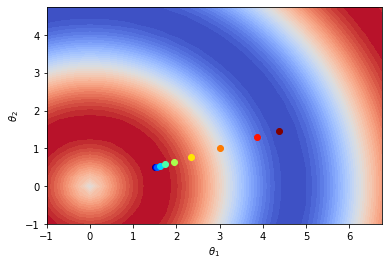

In [22]:
# all is well
eta=0.9
theta0 = np.array([1.5,0.5])
gradient_descent_with_plot(theta0, eta, epochMax)

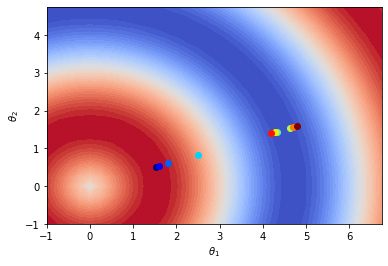

In [23]:
# the learning rate \eta is a bit too big: we bounce against the upside in frint of us
# but we more or less end up in the valley, which is good.
eta=2.2
theta0 = np.array([1.5,0.5])
gradient_descent_with_plot(theta0, eta, epochMax)

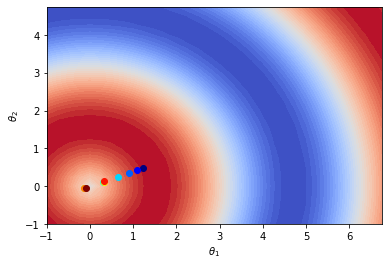

In [24]:
## We start from a point which is inside th basin of attraction of (0,0)
## eta is small enough that we may converge to it. 
eta=0.5
theta0 = np.array([1.3,0.5])
gradient_descent_with_plot(theta0, eta, epochMax)

## Crédits
### Topo sur la descente de Gradient 
#### fait par François Landes